## Zadania

1. Wczytać do ramki dane z pliku movie.csv.

In [5]:
import pandas as pd
move = pd.read_csv("movie.csv", sep=",", header=0)
move.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


2. Przygotować wykres słupkowy, w którym na osi x znajdzie się 10 lat, w których wystąpił najwyższy średni budżet filmów. Nadać tytuł osi y: "budget".

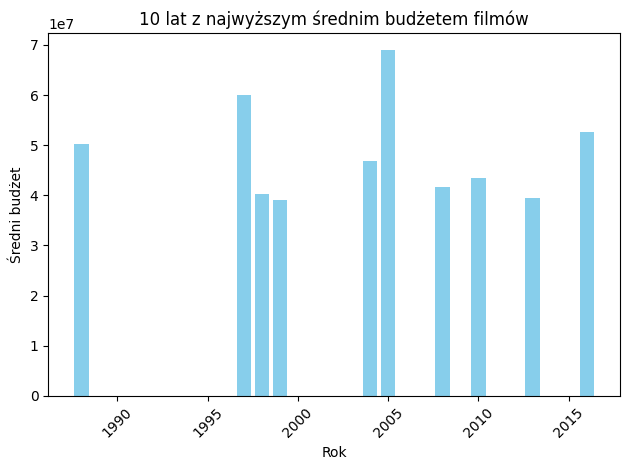

In [9]:
average_budget_per_year = move.groupby('title_year')['budget'].mean()

top_years = average_budget_per_year.nlargest(10)

plt.bar(top_years.index, top_years.values, color='skyblue')

plt.xlabel('Rok')
plt.ylabel('Średni budżet')
plt.title('10 lat z najwyższym średnim budżetem filmów')

# Obrócenie etykiet osi x dla lepszej czytelności
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


3. Przygotować wykres słupkowy przedstawiający oceny 20 najtańszych filmów. Na osi x umieścić tytuły filmów, a na osi y umieścić średnią ocenę.

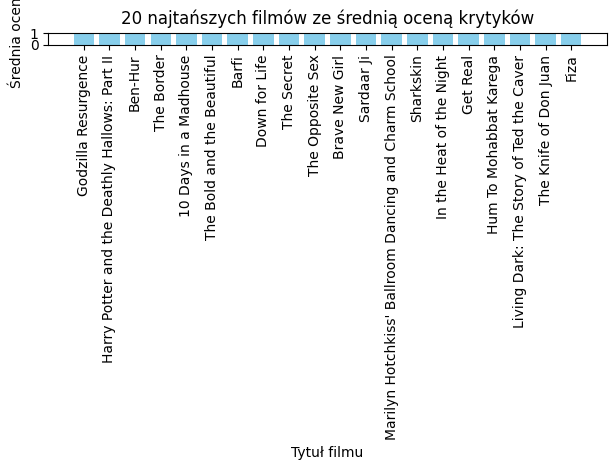

In [11]:
cheapest_movies = move.nsmallest(20, 'num_critic_for_reviews')

plt.bar(cheapest_movies['movie_title'], cheapest_movies['num_critic_for_reviews'], color='skyblue')

plt.xlabel('Tytuł filmu')
plt.ylabel('Średnia ocena')
plt.title('20 najtańszych filmów ze średnią oceną krytyków')

# Obrócenie etykiet osi x dla lepszej czytelności
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

4. Przygotować wykres liniowy przedstawiający sumę wartości w kolumnach: actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes w każdym roku.

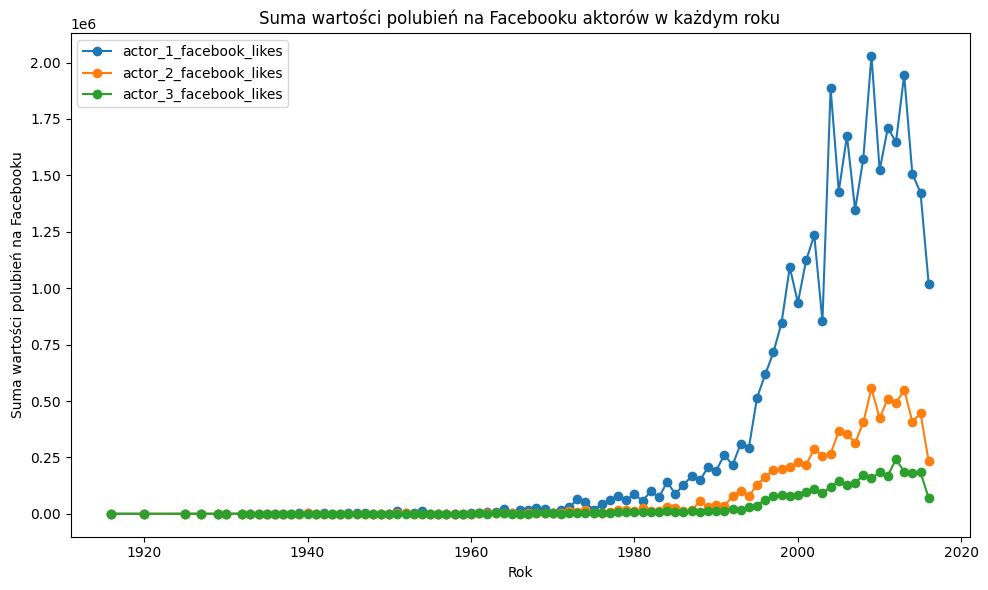

In [13]:
sum_likes_per_year = move.groupby('title_year')[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum()

sum_likes_per_year.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Rok')
plt.ylabel('Suma wartości polubień na Facebooku')
plt.title('Suma wartości polubień na Facebooku aktorów w każdym roku')

plt.legend()

plt.tight_layout()
plt.show()

5. Przygotować wykres liniowy przedstawiający zsumowane wartości w każdym roku dla kolumn: cast_total_facebook_likes oraz movie_facebook_likes dla wszystkich filmów, których budżet mieści się w przedziale [m-s, m+s], gdzie m oznacza średni budżet, a s oznacza odchylenie standardowe budżetu.

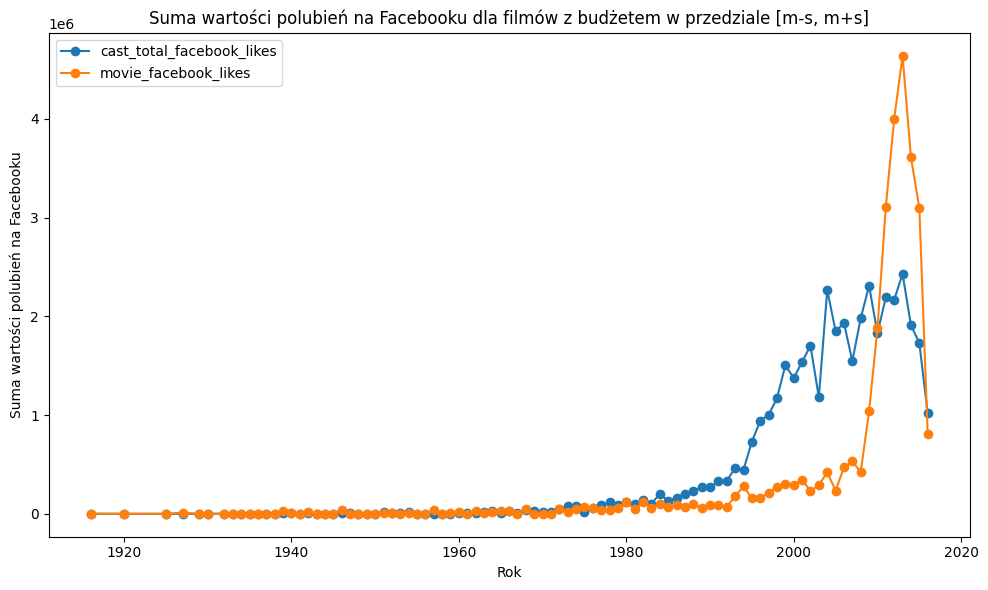

In [18]:
mean_budget = move['budget'].mean()

# Obliczenie odchylenia standardowego budżetu
std_budget = move['budget'].std()

# Wybór filmów, których budżet mieści się w przedziale [m-s, m+s]
selected_movies = move[(move['budget'] >= mean_budget - std_budget) & (move['budget'] <= mean_budget + std_budget)]

# Grupowanie wybranych filmów według roku i obliczenie sumy wartości w kolumnach
sum_likes_per_year = selected_movies.groupby('title_year')[['cast_total_facebook_likes', 'movie_facebook_likes']].sum()

# Tworzenie wykresu liniowego
sum_likes_per_year.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Rok')
plt.ylabel('Suma wartości polubień na Facebooku')

plt.title('Suma wartości polubień na Facebooku dla filmów z budżetem w przedziale [m-s, m+s]')

plt.legend()

plt.tight_layout()
plt.show()

6. Przygotować wykres kołowy przedstawiający udział każdego reżysera w 20 najdroższych filmach.

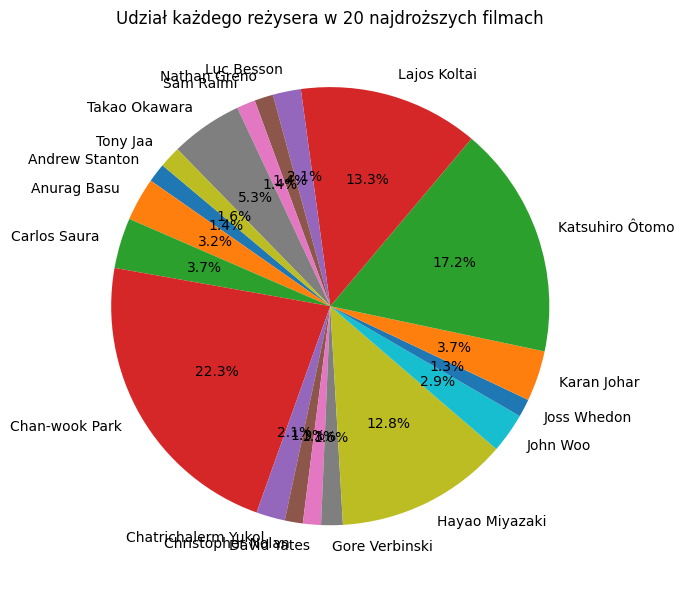

In [20]:
top_budget_movies = move.nlargest(20, 'budget')

director_budget_sum = top_budget_movies.groupby('director_name')['budget'].sum()

# Tworzenie wykresu kołowego
plt.figure(figsize=(10, 6))
plt.pie(director_budget_sum, labels=director_budget_sum.index, autopct='%1.1f%%', startangle=140)

# Dodanie tytułu wykresu
plt.title('Udział każdego reżysera w 20 najdroższych filmach')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()